In [265]:
import pandas as pd
import numpy as np

In [266]:
df = pd.read_csv("churn.csv", encoding_errors = 'ignore')

In [267]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,AZ,192.0,415.0,414-4276,no,yes,36.0,156.2,77.0,26.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324,WV,68.0,415.0,370-3271,no,no,0.0,231.1,57.0,39.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3325,RI,28.0,510.0,328-8230,no,no,0.0,180.8,109.0,30.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3326,CT,184.0,510.0,364-6381,yes,no,0.0,213.8,105.0,36.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3328 non-null   object 
 1   Account Length  3325 non-null   float64
 2   Area Code       3325 non-null   float64
 3   Phone           3325 non-null   object 
 4   Int'l Plan      3325 non-null   object 
 5   VMail Plan      3325 non-null   object 
 6   VMail Message   3325 non-null   float64
 7   Day Mins        3324 non-null   float64
 8   Day Calls       3324 non-null   float64
 9   Day Charge      3324 non-null   object 
 10  Eve Mins        3324 non-null   object 
 11  Eve Calls       3324 non-null   object 
 12  Eve Charge      3324 non-null   float64
 13  Night Mins      3324 non-null   float64
 14  Night Calls     3324 non-null   object 
 15  Night Charge    3323 non-null   object 
 16  Intl Mins       3323 non-null   float64
 17  Intl Calls      3323 non-null   f

In [269]:
#Dropping unncessary columns
df.drop(df.iloc[:,21:], inplace = True, axis = 1)

In [270]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.9,...,88,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,AZ,192.0,415.0,414-4276,no,yes,36.0,156.2,77.0,26.55,...,126,18.32,279.1,83,12.56,9.9,6.0,2.67,2,False.
3324,WV,68.0,415.0,370-3271,no,no,0.0,231.1,57.0,39.29,...,55,13.04,191.3,123,8.61,9.6,4.0,2.59,3,False.
3325,RI,28.0,510.0,328-8230,no,no,0.0,180.8,109.0,30.74,...,58,24.55,191.9,91,8.64,14.1,6.0,3.81,2,False.
3326,CT,184.0,510.0,364-6381,yes,no,0.0,213.8,105.0,36.35,...,84,13.57,139.2,137,6.26,5.0,10.0,1.35,2,False.


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3328 non-null   object 
 1   Account Length  3325 non-null   float64
 2   Area Code       3325 non-null   float64
 3   Phone           3325 non-null   object 
 4   Int'l Plan      3325 non-null   object 
 5   VMail Plan      3325 non-null   object 
 6   VMail Message   3325 non-null   float64
 7   Day Mins        3324 non-null   float64
 8   Day Calls       3324 non-null   float64
 9   Day Charge      3324 non-null   object 
 10  Eve Mins        3324 non-null   object 
 11  Eve Calls       3324 non-null   object 
 12  Eve Charge      3324 non-null   float64
 13  Night Mins      3324 non-null   float64
 14  Night Calls     3324 non-null   object 
 15  Night Charge    3323 non-null   object 
 16  Intl Mins       3323 non-null   float64
 17  Intl Calls      3323 non-null   f

# Data Cleaning

Some columns have object data type even though they should float or integer.

We will convert them to numeric, and if they are non numeric they will be replaced as NaN

In [272]:
df["State"].value_counts()

State
WV                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         106
NY                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          83
MN                                  

As we can see here there are some garbage values present in state column, lets locate and remove these values.


As we can see all the state values are 2 letters, so lets remove the garbage values which are more than 2 letters

In [273]:
df[df["State"].str.len() > 2]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1620,"Qu1z[LʡxN\r.,6 MK)6rNUW*YqOIw1u6S{i֭Ye<...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621,@ƇވܙK9P*'?;'H7m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1622,Yv_YuN?Ø߀Ъ!7!m{ӧHݻ41nA+9d̓#s|1[Nj{Hf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1623,<nD5,224.0,102.0,38.08,192,99,16.32,163.1,100.0,7.34,...,2,2.59,0.0,False.,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
#Dropping garbage values
df.drop(index = df.index[1620:1624], inplace = True)

In [275]:
#Checking if the problem is solved
df["State"].value_counts()

State
WV    106
NY     83
MN     82
AL     80
OH     78
OR     78
WI     77
WY     77
VA     76
CT     74
MI     73
ID     73
TX     72
VT     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     67
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
NE     61
OK     61
DE     61
SD     60
ND     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
AK     52
HI     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

In [276]:
df["Int\'l Plan"].value_counts()

Int'l Plan
no     3000
yes     323
n/        1
Name: count, dtype: int64

In [277]:
df[df["Int'l Plan"] == "n/"]
df.drop(index = 1611, inplace = True)

In [278]:
df["VMail Plan"].value_counts()
#Here yeS is same as yes so lets edit that
df[df["VMail Plan"] == "yeS"]
df.loc[1610,"VMail Plan"] = 'yes'

In [279]:
#Checking other numeric columns
cols = df.columns.drop(["State","Churn?","Int'l Plan","VMail Plan","Phone"])

In [280]:
cols

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [281]:
df[cols] = df[cols].apply(pd.to_numeric, errors = "coerce")

In [282]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,AZ,192.0,415.0,414-4276,no,yes,36.0,156.2,77.0,26.55,...,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False.
3324,WV,68.0,415.0,370-3271,no,no,0.0,231.1,57.0,39.29,...,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False.
3325,RI,28.0,510.0,328-8230,no,no,0.0,180.8,109.0,30.74,...,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False.
3326,CT,184.0,510.0,364-6381,yes,no,0.0,213.8,105.0,36.35,...,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False.


In [283]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          1
Day Calls         1
Day Charge        2
Eve Mins          2
Eve Calls         2
Eve Charge        1
Night Mins        1
Night Calls       1
Night Charge      2
Intl Mins         1
Intl Calls        1
Intl Charge       1
CustServ Calls    3
Churn?            2
dtype: int64

In [284]:
df["Churn?"].dropna(inplace = True)

In [285]:
cols

Index(['Account Length', 'Area Code', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [286]:
for column in df.columns:
    print(df[column].value_counts())

State
WV    106
NY     83
MN     82
AL     80
OH     78
OR     78
WI     77
WY     77
VA     76
CT     74
MI     73
ID     73
TX     72
VT     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     67
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ME     62
NM     61
NE     61
OK     61
DE     61
SD     60
ND     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
AK     52
HI     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
Account Length
105.0    43
87.0     42
101.0    40
93.0     40
90.0     39
         ..
243.0     1
200.0     1
232.0     1
5.0       1
221.0     1
Name: count, Length: 212, dtype: int64
Area Code
415.0    1648
510.0     839
408.0     836
Name: count, dtype: int64
Phone
382-4657    1
376-5375    1
396-1106    1
379-4372    1
336-3738    1
           ..
415-8780    1
362-1146    1
352-7413    1
387-6716    1
400-4344    1
Name: count, Length: 3323, dtype: 

There is some garbage values in Churn? lets solve it 

In [287]:
df["Churn?"].value_counts()

Churn?
False.    2836
True.      482
57           1
Falsό        1
8.49         1
Name: count, dtype: int64

In [288]:
df[(df["Churn?"] == "57") | (df["Churn?"] == "8.49") | (df["Churn?"] == "Falsό")]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1608,OR,163.0,408.0,346-3445,no,yes,25.0,219.6,99.0,37.33,...,99.0,17.88,242.7,88.00,10.92,13.8,8.00,3.73,NaN,57
1609,RI,104.0,408.0,382-3966,yes,no,0.0,160.4,73.0,27.27,...,103.0,24.98,306.6,90.00,13.80,12.6,5.00,3.40,4.0,Falsό
1740,RI,134.0,415.0,413-1789,no,no,0.0,141.7,95.0,NaN,...,0.0,226.70,94.0,38.54,168.40,129.0,14.31,188.70,117.0,8.49


In [290]:
df.drop(index = df.index[1608:1609], inplace = True)
df.drop(1740, inplace = True)

In [291]:
df["Churn?"].value_counts()

Churn?
False.    2836
True.      482
Falsό        1
Name: count, dtype: int64

In [292]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          1
Day Calls         1
Day Charge        1
Eve Mins          1
Eve Calls         2
Eve Charge        1
Night Mins        1
Night Calls       1
Night Charge      2
Intl Mins         1
Intl Calls        1
Intl Charge       1
CustServ Calls    2
Churn?            2
dtype: int64

In [293]:
df.dropna(inplace = True)

In [294]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

# Finding relationship between the variables

In [329]:
df["Churn?"].value_counts()

Churn?
0        2835
1         482
Falsό       1
Name: count, dtype: int64

In [345]:
df[df["Churn?"] == "Falsό"]
#df.drop(index = 1609,axis = 0)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?


In [343]:
df.drop(index = 1609, inplace = True)

As you can see this is an unbalanced dataset 

to find predicting power of each variable we can use weight of evidence or point biseral coefficient


In [296]:
df[df["Churn?"] == 'False.']

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128.0,415.0,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,OH,107.0,415.0,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,NJ,137.0,415.0,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,OH,84.0,408.0,375-9999,yes,no,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False.
4,OK,75.0,415.0,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,AZ,192.0,415.0,414-4276,no,yes,36.0,156.2,77.0,26.55,...,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,False.
3324,WV,68.0,415.0,370-3271,no,no,0.0,231.1,57.0,39.29,...,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,False.
3325,RI,28.0,510.0,328-8230,no,no,0.0,180.8,109.0,30.74,...,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,False.
3326,CT,184.0,510.0,364-6381,yes,no,0.0,213.8,105.0,36.35,...,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,False.


In [298]:
df["Churn?"].replace('True.',1, inplace = True)
df["Churn?"].replace('False.',0, inplace = True)


C:\Users\Het\AppData\Local\Temp/ipykernel_17896/1953213560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn?"].replace('True.',1, inplace = True)
C:\Users\Het\AppData\Local\Temp/ipykernel_17896/1953213560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [299]:
df['Churn?'].value_counts()

Churn?
0        2835
1         482
Falsό       1
Name: count, dtype: int64

In [300]:
conti_columns = df.columns.drop(["State",'Account Length','Phone',"Int'l Plan",'VMail Plan',"Churn?"])

In [301]:
conti_columns

Index(['Area Code', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

In [391]:
from scipy.stats import pointbiserialr

for col in conti_columns:
    # Calculate point biserial correlation
    corr, p_value = pointbiserialr(df['Churn?'], df[col])
    print(f"Point Biserial Correlation for {col}: {corr}, p-value: {p_value}")


Point Biserial Correlation for Area Code: 0.005752298724127849, p-value: 0.7405143225687483
Point Biserial Correlation for VMail Message: -0.08942955308673727, p-value: 2.483383214190962e-07
Point Biserial Correlation for Day Mins: 0.20493250787065645, p-value: 8.758972076702925e-33
Point Biserial Correlation for Day Calls: 0.017516900025136874, p-value: 0.3131880993544554
Point Biserial Correlation for Day Charge: 0.20493256657403705, p-value: 8.758604987269086e-33
Point Biserial Correlation for Eve Mins: 0.09250428405762061, p-value: 9.44581238846992e-08
Point Biserial Correlation for Eve Calls: 0.007354465708434616, p-value: 0.6719926628079789
Point Biserial Correlation for Eve Charge: 0.09249372941427692, p-value: 9.477713043623803e-08
Point Biserial Correlation for Night Mins: 0.036830729739582124, p-value: 0.033911102733159545
Point Biserial Correlation for Night Calls: 0.004330405505249038, p-value: 0.8031210331510956
Point Biserial Correlation for Night Charge: 0.03683185045623

P-value is insignificant in the following Day Calls,Eve Calls, NIght calls

In [ ]:
#Whats left to do, Graph, weight of evidence, Modelling

In [303]:
df_conti = pd.DataFrame(df, columns = conti_columns)

<AxesSubplot:>

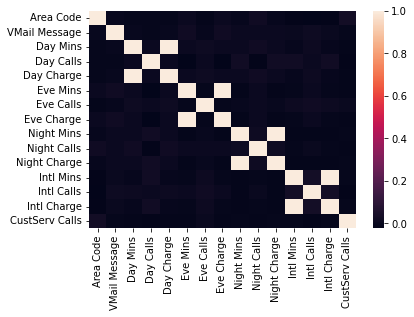

In [304]:
df_conti.corr()
import seaborn as sns
sns.heatmap(df_conti.corr())

Here we can see multicolineriaty, among some terms.

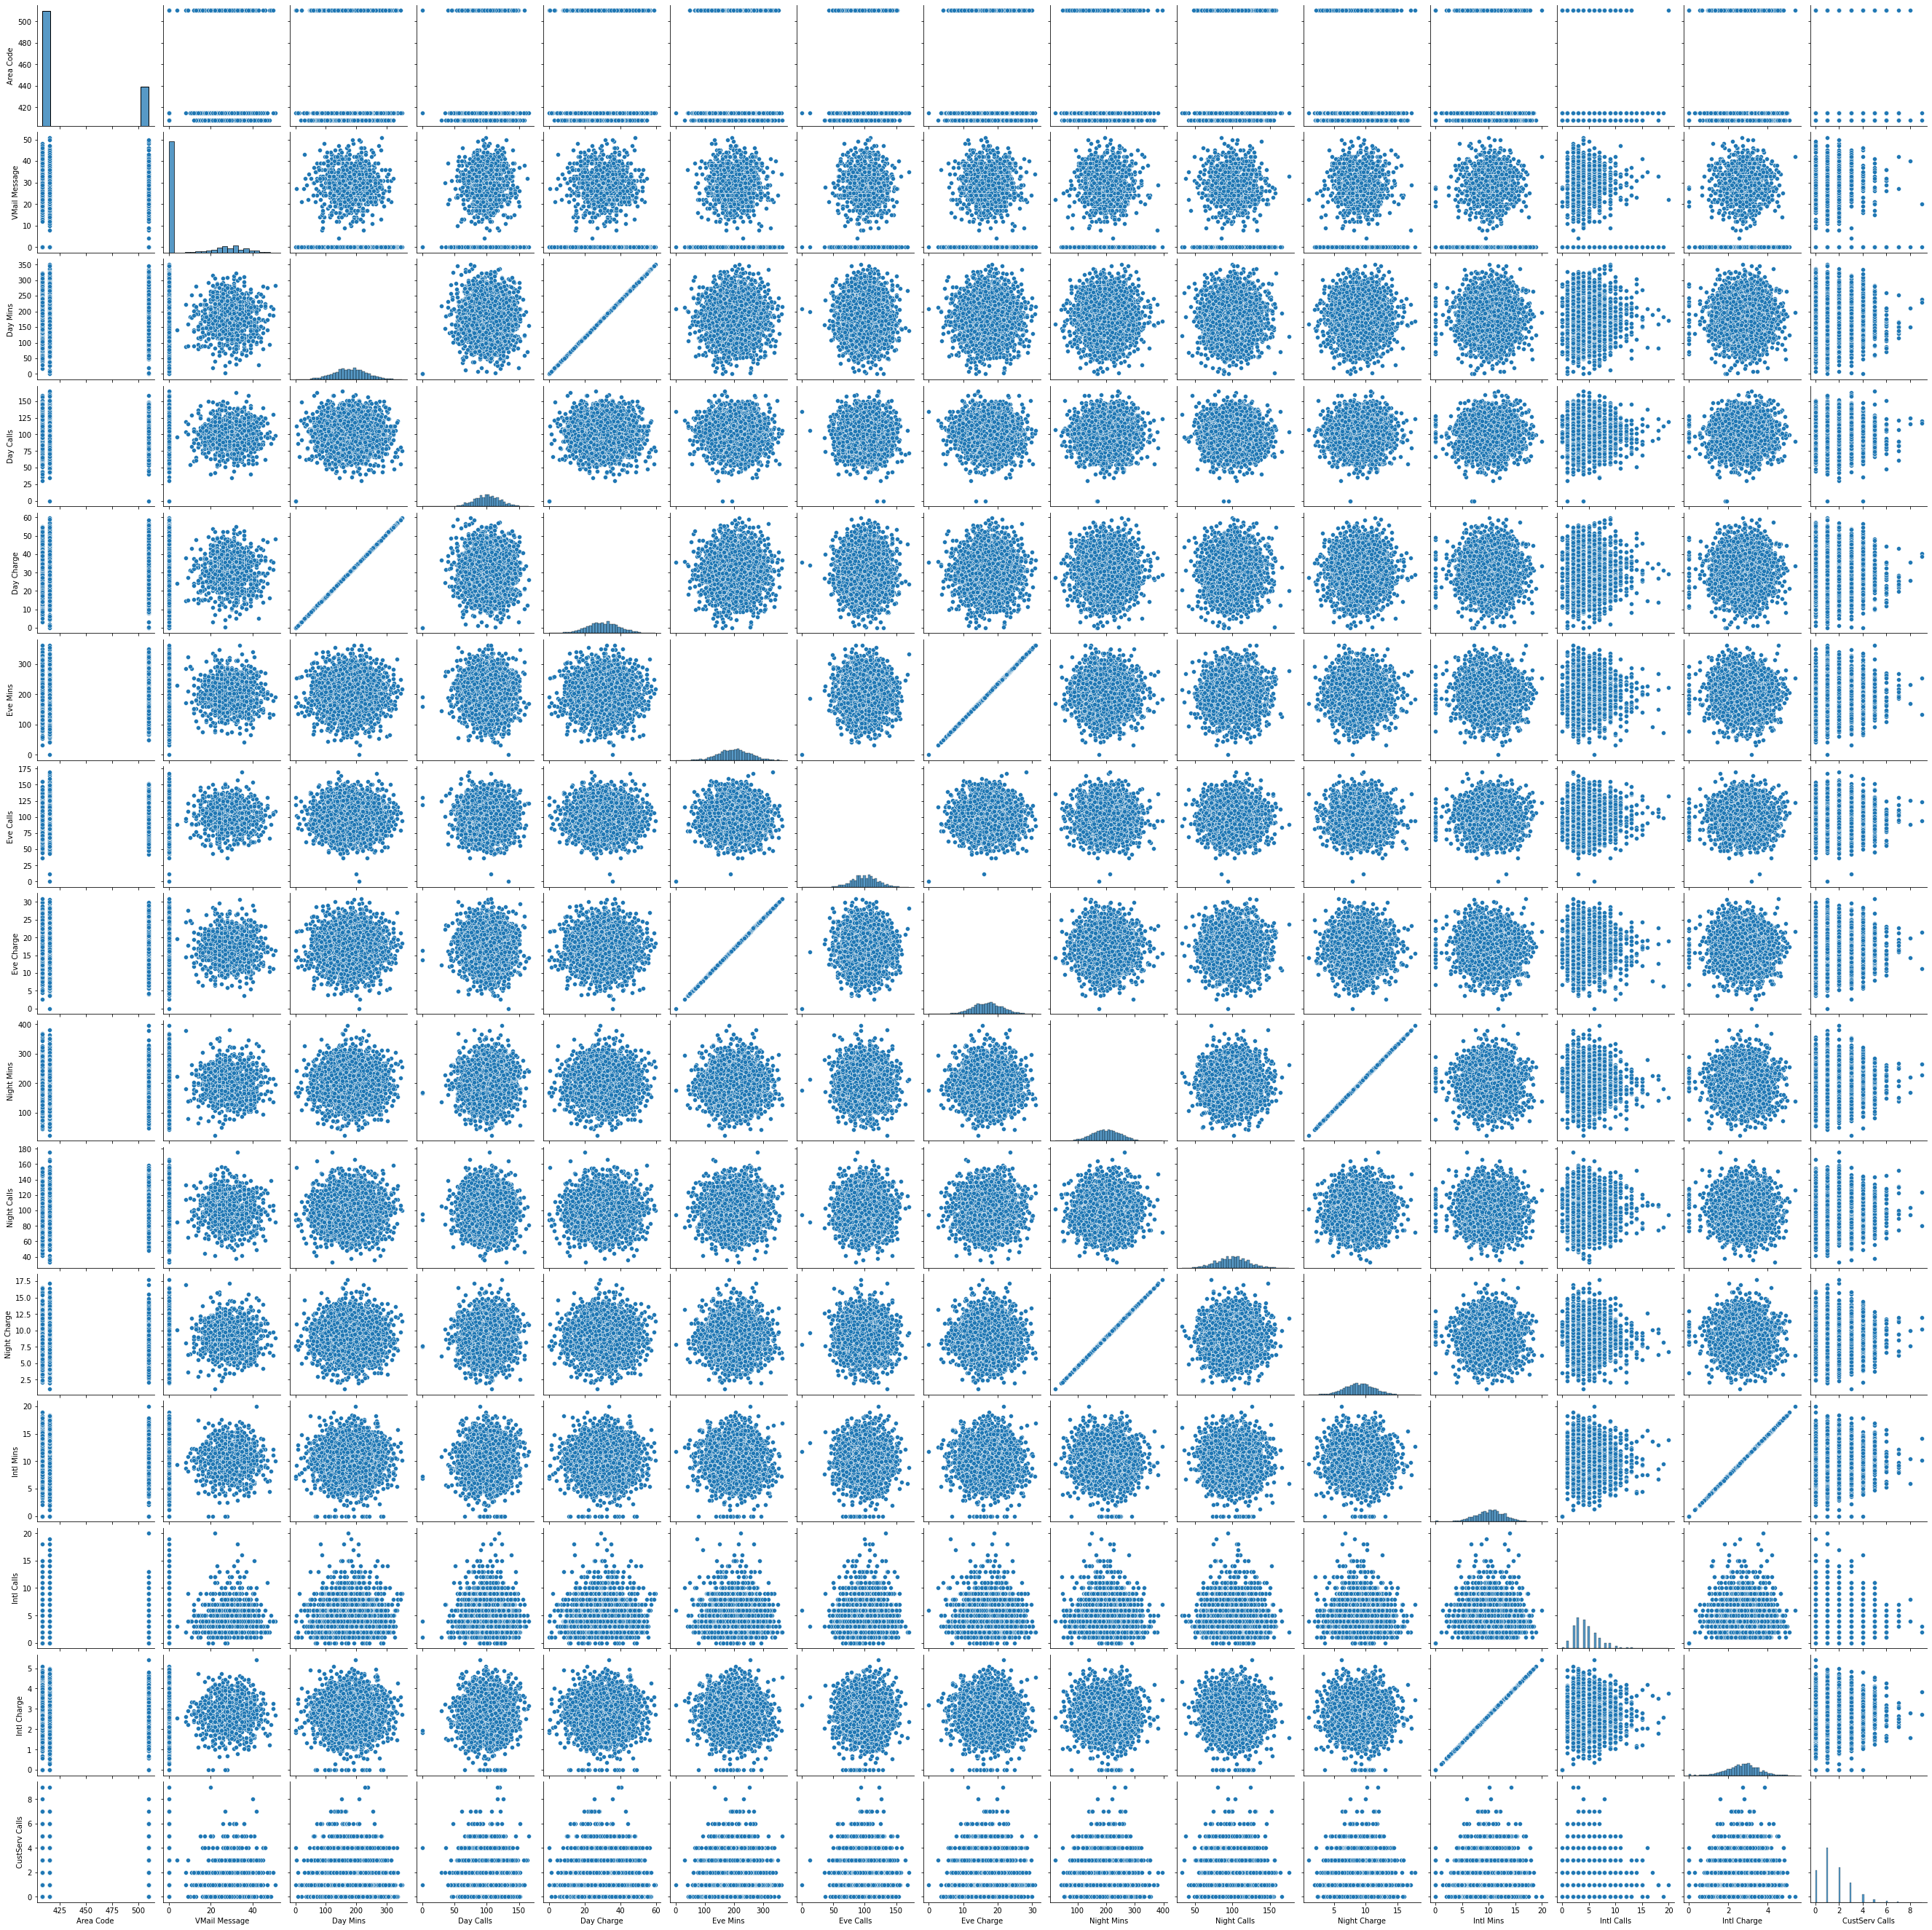

In [305]:
sns.pairplot(df_conti)

Statistical analysis 

In [306]:
churn_group = df[df["Churn?"] == 1]
non_churn_group = df[df["Churn?"] == 0]

In [307]:
# Assuming churn_group and non_churn_group are DataFrames
for col in churn_group.columns:
    # Check if the column type is float64
    if churn_group[col].dtype == "float64":
        churn_mean = churn_group[col].mean()
        non_churn_mean = non_churn_group[col].mean()
        churn_median = churn_group[col].median()
        non_churn_median = non_churn_group[col].median()
        print(f"The mean of the churn group for {col} is {churn_mean} and for the non-churn group is {non_churn_mean}")
        print(f"The median of the churn group for {col} is {churn_median} and for the non-churn group is {non_churn_median}")


The mean of the churn group for Account Length is 102.7116182572614 and for the non-churn group is 100.76331569664903
The median of the churn group for Account Length is 103.0 and for the non-churn group is 100.0
The mean of the churn group for Area Code is 437.8651452282158 and for the non-churn group is 437.17283950617286
The median of the churn group for Area Code is 415.0 and for the non-churn group is 415.0
The mean of the churn group for VMail Message is 5.126556016597511 and for the non-churn group is 8.6
The median of the churn group for VMail Message is 0.0 and for the non-churn group is 0.0
The mean of the churn group for Day Mins is 206.78589211618254 and for the non-churn group is 175.13485008818344
The median of the churn group for Day Mins is 217.39999999999998 and for the non-churn group is 177.2
The mean of the churn group for Day Calls is 101.29668049792531 and for the non-churn group is 100.2984126984127
The median of the churn group for Day Calls is 103.0 and for the

From this above some extreme and important differences in mean and median of the churn and non churn group:
    Customer Service vmail msg,  
    Day Mins 
    and Day Charge
    Eve mins
    NIght Mins

We can see that the independent columns are highly correlated, so we will calculate VIF

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.float_format', '{:.2f}'.format)


# Assume df is your DataFrame with independent variables
X = df[["Day Mins", 'Day Calls', 'Day Charge', 'Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls',]]  # Replace with actual variable names
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


           feature          VIF
0         Day Mins 124384502.35
1        Day Calls        21.38
2       Day Charge 124388954.74
3         Eve Mins  37301174.86
4        Eve Calls        21.70
5       Eve Charge  37302074.54
6       Night Mins  10697240.78
7      Night Calls        22.11
8     Night Charge  10696946.27
9        Intl Mins    998008.84
10      Intl Calls         4.24
11     Intl Charge    998388.37
12  CustServ Calls         2.38


We can see there is very high VI, so we will remove high multicolinearity

In [313]:
df["Int'l Plan"].replace('no',0, inplace = True)
df["Int'l Plan"].replace('yes',1, inplace = True)
df["VMail Plan"].replace('yes',1, inplace = True)
df["VMail Plan"].replace('no',0, inplace = True)




C:\Users\Het\AppData\Local\Temp/ipykernel_17896/2625564969.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Int'l Plan"].replace('yes',1, inplace = True)
C:\Users\Het\AppData\Local\Temp/ipykernel_17896/2625564969.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["VMail Plan"].replace('ye

## Decision Tree

In [351]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [360]:
feature_cols = [ 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']

In [384]:
df["Churn?"] = pd.to_numeric(df["Churn?"])

In [385]:
X = df[feature_cols]
y = df["Churn?"]

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 1)

In [389]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [390]:
metrics.accuracy_score(y_test, y_pred)


0.8765060240963856

## Logistic Regression

These columns had significant mean and median difference among the groups, so lets use these to build a logisitic regression model

In [395]:
feature_col = ['CustServ Calls','VMail Message','Day Charge','Eve Mins','Night Mins']
X = df[feature_col]
y= df["Churn?"]

In [396]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [398]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [400]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix


array([[839,  13],
       [131,  13]], dtype=int64)

NameError: name 'Text' is not defined

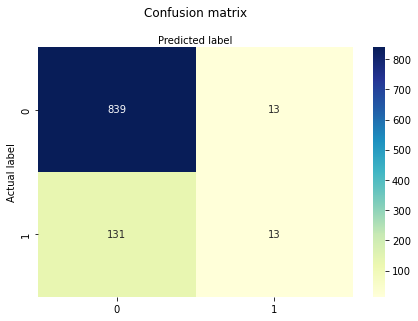

In [401]:
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [402]:
metrics.accuracy_score(y_pred,y_test)

0.8554216867469879

## Random Forest

In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [405]:
y_pred = rf.predict(X_test)

In [406]:
metrics.accuracy_score(y_pred,y_test)

0.9317269076305221

In [409]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[842,  58],
       [ 10,  86]], dtype=int64)

In [410]:
metrics.precision_score(y_pred,y_test)

0.5972222222222222

In [411]:
metrics.recall_score(y_pred,y_test)

0.8958333333333334